Code Reuse Session 3 - Question 1

In [61]:
# importing the library to load the dataset
import pandas as pd

Code Reuse Session 3 - Question 2

In [62]:
# loading the classification dataset
data = pd.read_csv('/content/Classification_CW_Dataset.csv')

# viewing the dataset
data.head(10)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,0,0,0,0,1,3,1,4.0,1,1,24.0,1,0
1,50.0,0,1,1,2,0,2,1,35.0,1,1,14.0,5,0
2,58.0,0,2,2,4,0,2,1,63.0,1,1,14.0,7,0
3,58.0,0,0,0,0,1,3,1,18.0,1,1,2.0,1,0
4,47.0,0,1,0,1,1,3,1,41.0,1,1,3.0,1,0
5,51.0,0,0,0,0,0,2,1,20.0,1,1,18.0,2,0
6,51.0,0,0,0,0,3,1,1,8.0,1,1,11.0,1,0
7,40.0,0,1,0,1,0,2,1,30.0,1,1,9.0,1,1
8,40.0,0,3,2,4,1,3,1,103.0,1,1,20.0,18,0
9,69.0,0,3,2,4,3,1,0,32.0,1,1,21.0,12,0


Code Reuse Session 3 - Question 3

In [63]:
# checking if the dataset variables have correct datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4018 non-null   float64
 1   Sex                     4018 non-null   int64  
 2   T_Stage                 4018 non-null   int64  
 3   N_Stage                 4018 non-null   int64  
 4   6th_Stage               4018 non-null   int64  
 5   Differentiated          4018 non-null   int64  
 6   Grade                   4018 non-null   int64  
 7   A_Stage                 4018 non-null   int64  
 8   Tumor_Size              4018 non-null   float64
 9   Estrogen_Status         4018 non-null   int64  
 10  Progesterone_Status     4018 non-null   int64  
 11  Regional_Node_Examined  4018 non-null   float64
 12  Reginol_Node_Positive   4018 non-null   int64  
 13  Mortality_Status        4018 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 4

Code Reuse Session 3 - Question 5

In [64]:
feature_cols = ['Age', 'Sex','T_Stage','N_Stage','6th_Stage','Differentiated','Grade','A_Stage','Tumor_Size','Estrogen_Status','Progesterone_Status','Regional_Node_Examined','Reginol_Node_Positive']
X = data[feature_cols]
y = data['Mortality_Status']

Code Reuse Session 3 - Question 6

In [65]:
# importing a library to randomly sample training and test subsets
from sklearn.model_selection import train_test_split

Code Reuse Session 3 - Question 5

In [66]:
# sampling the dataset into training and test subsets with a ratio to ensure the reproducibility of the sampling output
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

Building NB Base Learner

Code leveraged from Tutorial 7 - Page 3

Classification report of NB
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       681
           1       0.29      0.41      0.34       123

    accuracy                           0.76       804
   macro avg       0.59      0.62      0.60       804
weighted avg       0.79      0.76      0.77       804

Confusion matrix of NB


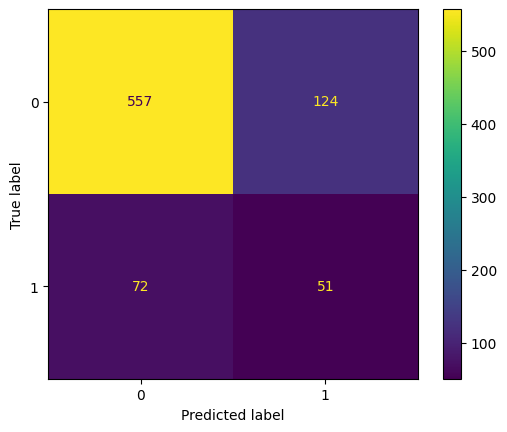

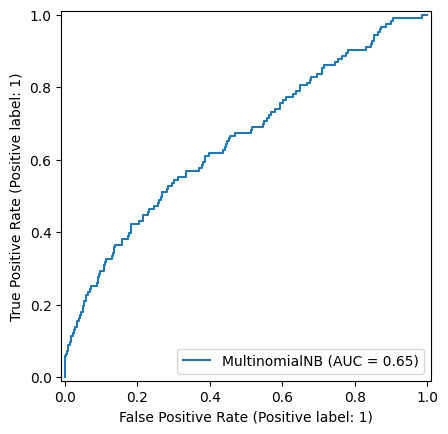

In [67]:
# import the NB algorithm
from sklearn.naive_bayes import MultinomialNB

# creating an instance of it
nb = MultinomialNB()

# fitting the model
nb.fit(X_train, y_train)

# making predictions on the test  data
y_pred = nb.predict(X_test)

# evaluating using the classification report
from sklearn.metrics import classification_report
# printing it
print("Classification report of NB")
print(classification_report(y_test, y_pred))

# evaluate using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# printing it
print("Confusion matrix of NB")
nb_cm = confusion_matrix(y_test, y_pred)
# plotting it
disp=ConfusionMatrixDisplay(confusion_matrix=nb_cm,display_labels=nb.classes_)
disp.plot()

# AUC-ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(nb, X_test, y_test)

Building LR Base Learner

Code leveraged from Tutorial 7 - Page 4

Classification report of LR
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       681
           1       0.78      0.17      0.28       123

    accuracy                           0.87       804
   macro avg       0.82      0.58      0.60       804
weighted avg       0.85      0.87      0.83       804

Confusion matrix of LR


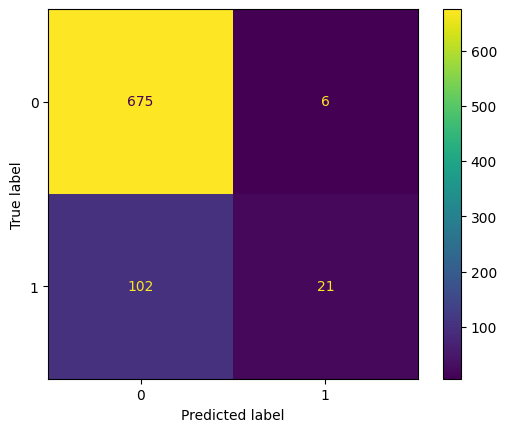

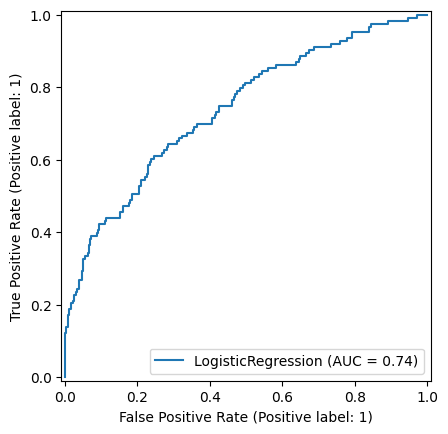

In [68]:
# importing the library
from sklearn.linear_model import LogisticRegression

# creating a model
lr = LogisticRegression(max_iter=4000)

# fitting the model
lr.fit(X_train, y_train)

# making predictions
y_pred = lr.predict(X_test)

# evaluating using the classification report

# printing it
print("Classification report of LR")
print(classification_report(y_test, y_pred))

# evaluating using Confusion matrix

# printing it
print("Confusion matrix of LR")
lr_cm = confusion_matrix(y_test, y_pred)
# plotting it
disp=ConfusionMatrixDisplay(confusion_matrix=lr_cm,display_labels=lr.classes_)
disp.plot()

# AUC-ROC
RocCurveDisplay.from_estimator(lr, X_test, y_test)

Building the Ensemble Model using Soft Voting

Code leveraged from Tutorial 7 - Page 6-7

Classification report of Ensemble
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       681
           1       0.32      0.37      0.34       123

    accuracy                           0.78       804
   macro avg       0.60      0.62      0.61       804
weighted avg       0.80      0.78      0.79       804



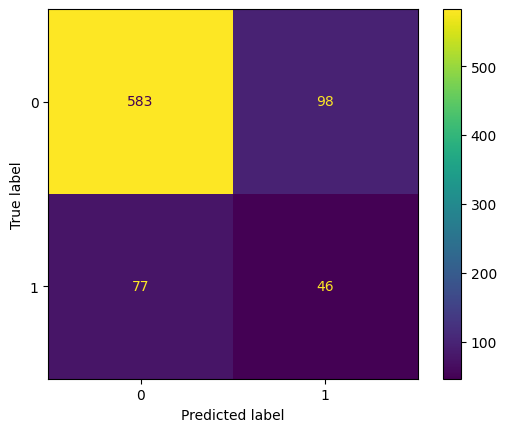

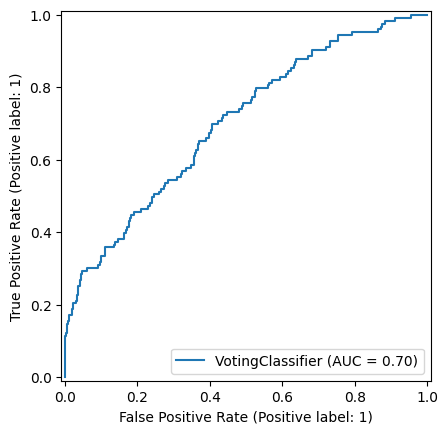

In [69]:
# initating a new ensemble model
from sklearn.ensemble import VotingClassifier

# creating a new disctionary for base learners
base_learners = [
    ('NB', nb),
    ('LR', lr)
]

# creating the voting classifier
voting_classifier = VotingClassifier(base_learners, voting='soft')

# fitting the model
voting_classifier = voting_classifier.fit(X_train, y_train)

# making predictions on test data
y_pred = voting_classifier.predict(X_test)

# evaluating the model using a classification report
print("Classification report of Ensemble")
print(classification_report(y_test, y_pred))

# generating a confusion matrix
ensemble_learner_cm = (confusion_matrix(y_test, y_pred))
disp=ConfusionMatrixDisplay(confusion_matrix=ensemble_learner_cm,display_labels = voting_classifier.classes_)
# plotting it
disp.plot()

# generating AUC-ROC
RocCurveDisplay.from_estimator(voting_classifier, X_test, y_test)

Decision Tree Regressor

Code Reuse session 3 - Question 2

In [70]:
# loading the regression dataset
dataset = pd.read_csv('/content/Regression_CW_Dataset.csv')

# viewing the dataset
dataset.head(10)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,40.0,0,1,0,1,0,2,1,30.0,1,1,9.0,1,14,1
1,68.0,0,0,0,0,0,2,1,13.0,1,1,9.0,1,64,1
2,57.0,0,2,2,4,0,2,1,70.0,1,1,12.0,12,42,1
3,42.0,0,0,2,4,0,2,1,9.0,0,0,15.0,2,39,1
4,67.0,0,0,0,0,0,2,1,13.0,1,1,16.0,3,60,1
5,31.0,0,2,2,4,1,3,1,70.0,1,1,23.0,23,44,1
6,64.0,0,1,2,4,1,3,1,34.0,1,0,24.0,20,12,1
7,53.0,0,2,0,2,1,3,1,60.0,1,1,8.0,1,91,1
8,63.0,0,1,1,2,3,1,1,26.0,1,1,5.0,4,87,1
9,45.0,0,1,2,4,1,3,1,25.0,1,1,21.0,16,40,1


Code Reuse Session 3 - Question 3

In [71]:
# checking if the dataset variables have correct datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     615 non-null    float64
 1   Sex                     615 non-null    int64  
 2   T_Stage                 615 non-null    int64  
 3   N_Stage                 615 non-null    int64  
 4   6th_Stage               615 non-null    int64  
 5   Differentiated          615 non-null    int64  
 6   Grade                   615 non-null    int64  
 7   A_Stage                 615 non-null    int64  
 8   Tumor_Size              615 non-null    float64
 9   Estrogen_Status         615 non-null    int64  
 10  Progesterone_Status     615 non-null    int64  
 11  Regional_Node_Examined  615 non-null    float64
 12  Reginol_Node_Positive   615 non-null    int64  
 13  Survival_Months         615 non-null    int64  
 14  Mortality_Status        615 non-null    in

Code Reuse Session 3 - Question 4

In [72]:
# declaring the input features
X = dataset.drop(["Survival_Months"],axis=1)

# declaring the target varuable
y = dataset[['Survival_Months']]

Code Reuse Session 1 - Question 6

In [73]:
# checking the shape of X
print("Input features shape:", X.shape)

# checking the shape of y
print("Target feature shape:", y.shape)

Input features shape: (615, 14)
Target feature shape: (615, 1)


Code Reuse Session 3 - Question 5

In [74]:
# sampling the dataset into train and test sets
# importing the library
from sklearn.model_selection import train_test_split

# splitting into 2 sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

Code Reuse Session 3 - Question 6

In [75]:
# modelling the prediction of survival months using a decision tree regressor
# importing the necessary library
from sklearn.tree import DecisionTreeRegressor

Code Reuse Session 3 - Question 7

In [76]:
# creating the model
DT_regressor = DecisionTreeRegressor()

# fitting the model
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

Code Reuse Session 3 - Question 8

In [77]:
# making predictions on isolated data and evaluating
y_pred = DT_regressor.predict(X_test)

Leveraged from Tutorial 6 - Page 4

In [78]:
# To find the full depth of the decision tree
print("The number of levels: ", DT_regressor.tree_.max_depth)

The number of levels:  19


Code Reuse Session 3 - Question 10

In [79]:
# initiating a library to plot the tree
from sklearn import tree
from matplotlib import pyplot as plt

Code Reuse Session 3 - Question 11

In [80]:
# plotting the decision tree model for survival months
Tree_figure = plt.figure(figsize=(200,200))
DT_graph = tree.plot_tree(DT_regressor, filled=True, feature_names=list(X.columns))

Output hidden; open in https://colab.research.google.com to view.

Code Reuse Session 3 - Question 12

In [ ]:
# saving the tree as a high resolution image
Tree_figure.savefig("decision_tree.png")

Leveraged from Tutorial 6 - Page 19

In [81]:
# pruning the decision tree to 4 levels
pruned_DT_regressor = DecisionTreeRegressor(max_depth=4)

# modelling the dataset
pruned_DT_regressor.fit(X_train, y_train)

# making predictions on the test set, ues the predict method:
y_pred_pruned = pruned_DT_regressor.predict(X_test)

Leveraged from Tutorial 6 - Page 19

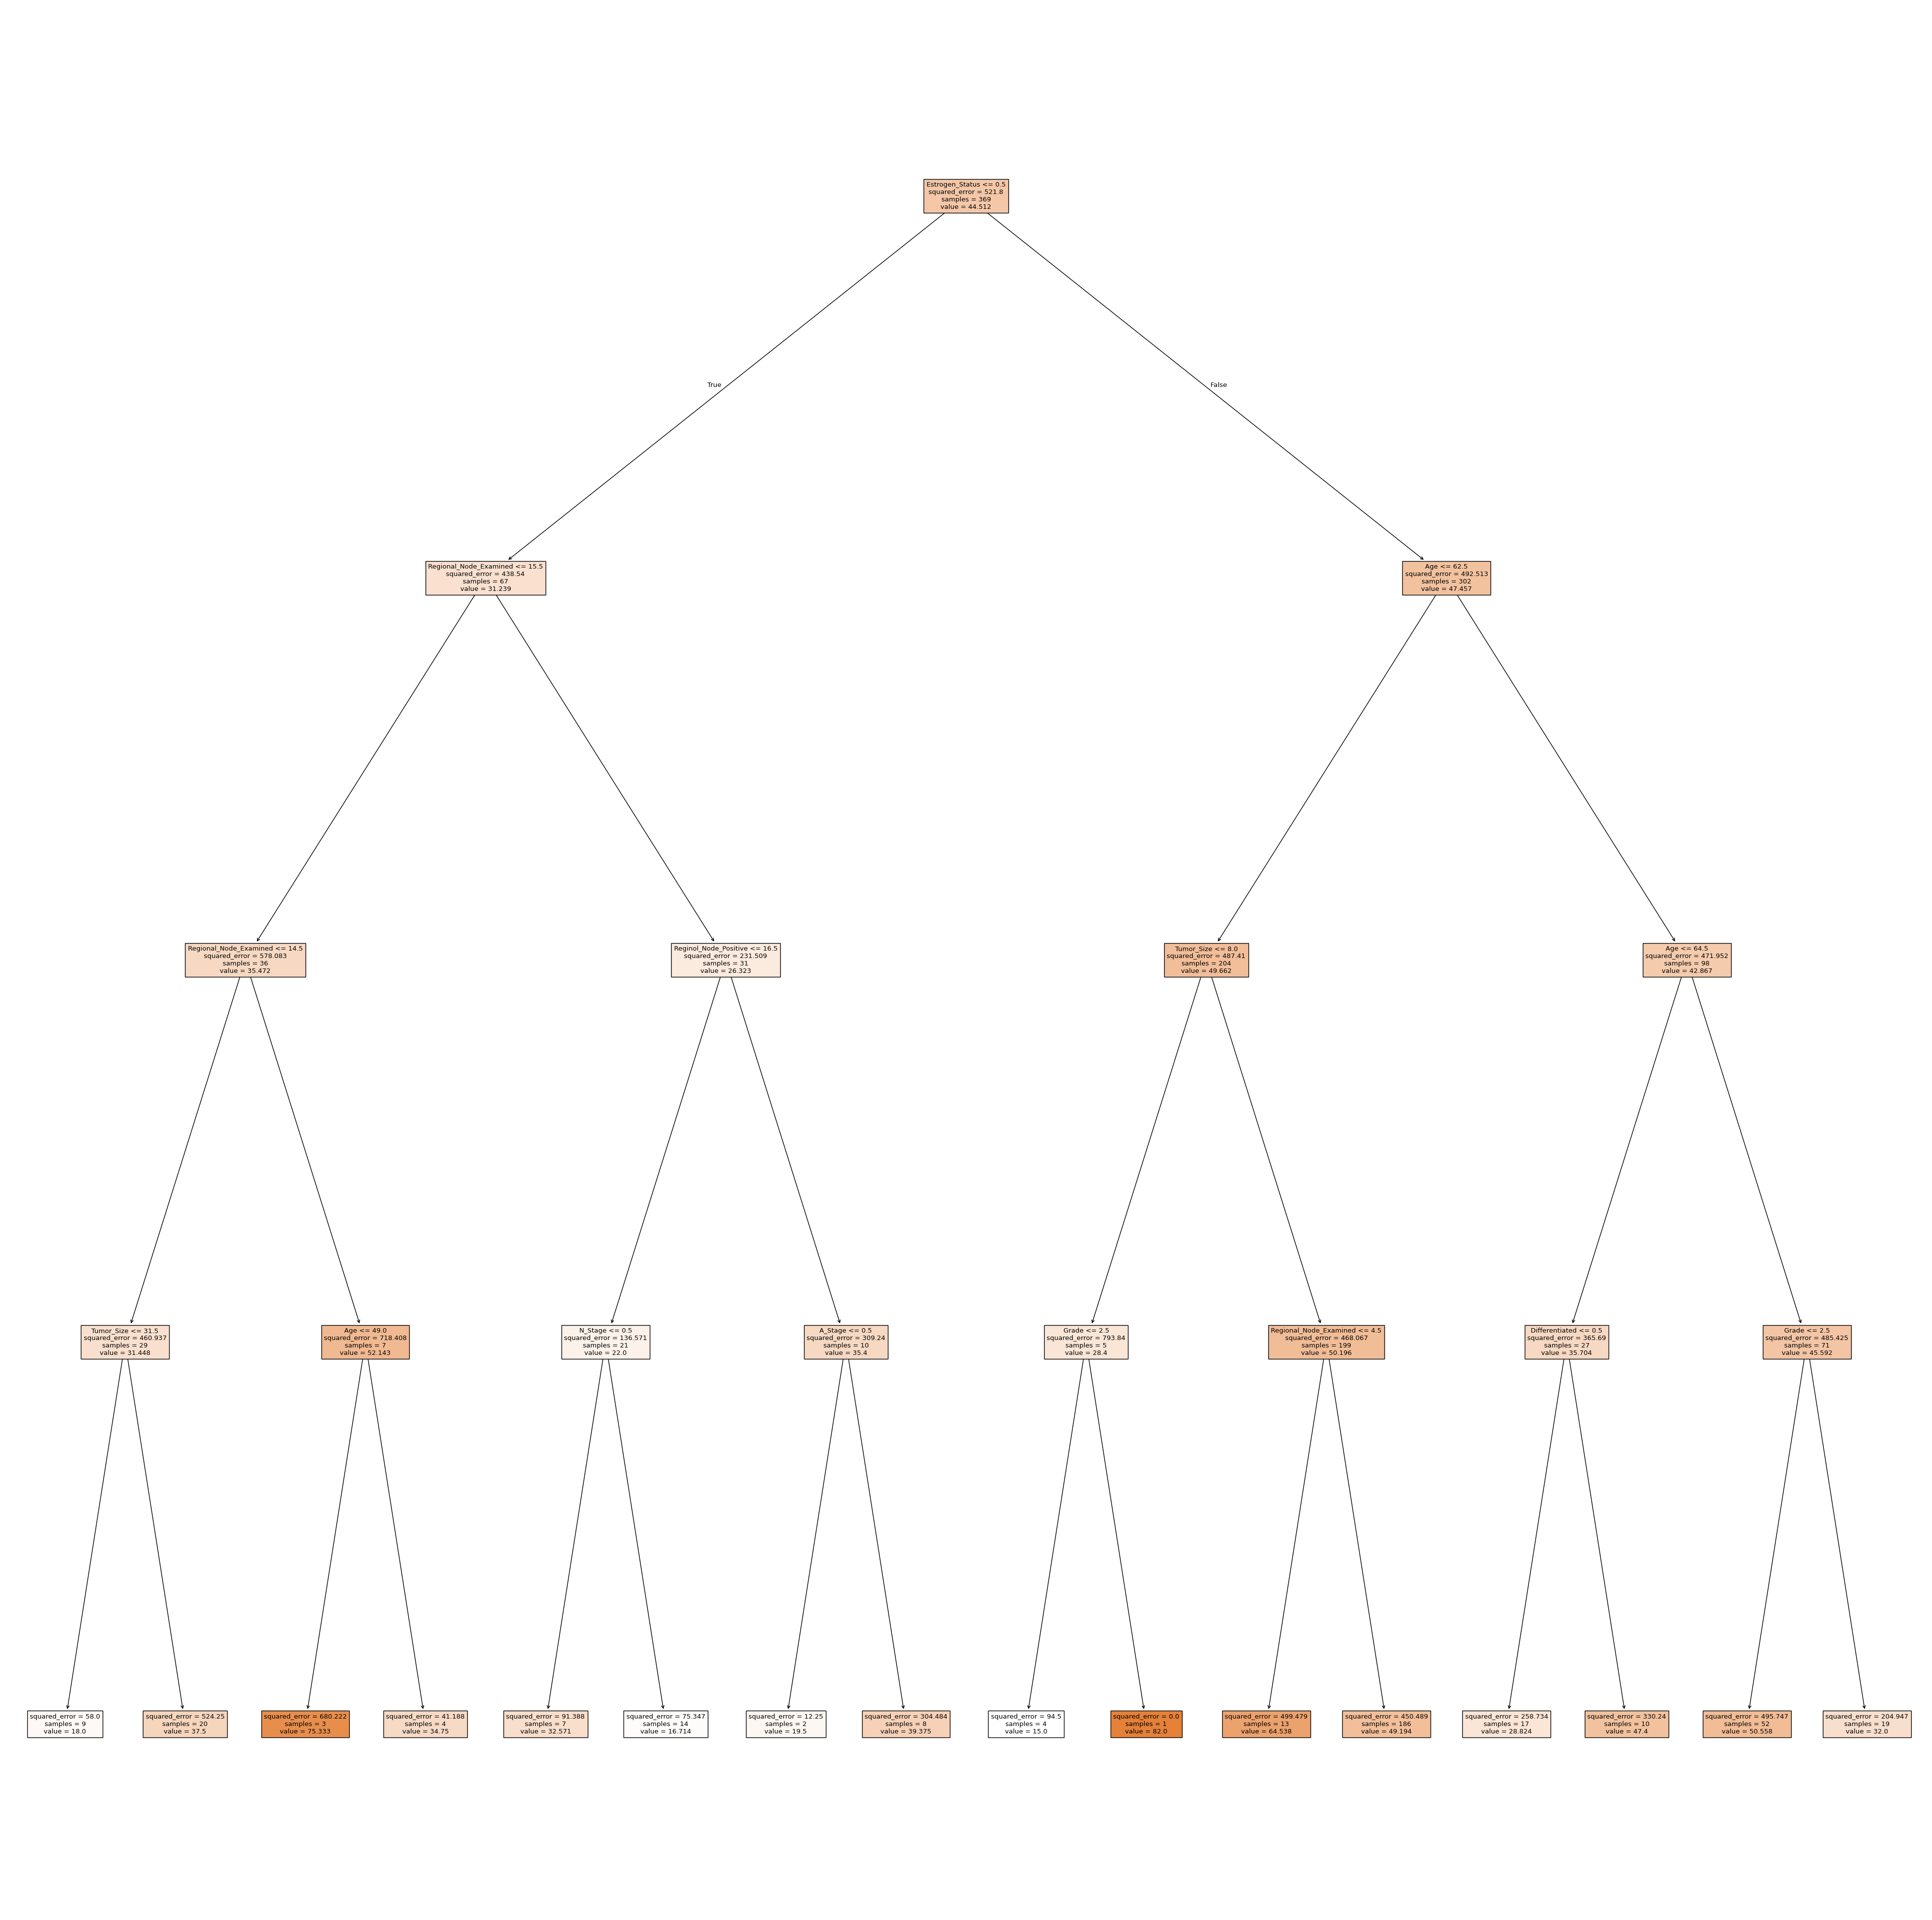

In [82]:
# plotting the pruned decision tree
Pruned_Tree_figure = plt.figure(figsize=(50,50))
DT_graph = tree.plot_tree(pruned_DT_regressor, filled=True, feature_names=list(X.columns))

Leveraged from Tutorial 6 - Page 19

In [ ]:
# saving the pruned decision tree
Pruned_Tree_figure.savefig("pruned_decision_tree.png")

Leveraged from Tutorial 6 - Page 20-21

In [83]:
#  to assess how well the model predicts the survival months of new (unseen) cancer patients, obtaining some regression performance metrics for the model

# importing the necessary libraries
from sklearn import metrics
import numpy as np

Leveraged from Tutorial 6 - Page 20-21

In [87]:
# applying the metrics methods to calculate the regression metrics, then present their values
# applying to the fully grown decision tree

# Mean Squared Error (MSE)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# printing the root mean squared error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# r2 score
print('R2:', metrics.r2_score(y_test, y_pred))

# printing the mean absolute error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


MSE: 1342.2560975609756
RMSE: 36.636813419851016
R2: -1.0696995823372828
MAE: 29.134146341463413


Leveraged from Tutorial 6 - Page 20-21

In [90]:
# calculating for the pruned regression decision tree

# calculating and printing the MAE
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred_pruned))

# calculating and printing the MSE
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred_pruned))

# calculating and printing the RMSE
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_pruned)))

# calculating and printing the R2 Score
print("R2 Score: ", metrics.r2_score(y_test, y_pred_pruned))

Mean Absolute Error:  21.1617335818509
Mean Squared Error:  677.1380047535736
Root Mean Squared Error:  26.02187550415176
R2 Score:  -0.044116877673194166


Leveraged from Tutorial 6 - Page 20-21

In [94]:
# Using hyperparameter tuning with GridSearchCV to estimate the best pruning hyperparameters

# importing the library
from sklearn.model_selection import GridSearchCV
import numpy as np

# creating a new decision tree model
regressor_optimise = DecisionTreeRegressor()

# creating a disctionary of all values to test
param_grid = {'max_depth': np.arange(1, 22), 'criterion': ['squared_error'], 'splitter':['best', 'random']}

#use gridsearch to test all values for n_neighbors
regressor_gscv = GridSearchCV(regressor_optimise, param_grid, cv=5, scoring = 'r2')

#fit model to data
regressor_gscv.fit(X, y)

#get the best parameters
regressor_gscv.best_params_

{'criterion': 'squared_error', 'max_depth': np.int64(2), 'splitter': 'random'}

Leveraged from Tutorial 6 - Page 20-21

In [95]:
# creating the decision tree with new parameters
regressor_optimal = DecisionTreeRegressor(criterion='squared_error', max_depth=np.int64(2), splitter='random')

# fitting the model
regressor_optimal.fit(X_train, y_train)

# predicting the response to test dataset
y_pred_optimal = regressor_optimal.predict(X_test)

#printing the new performance metrics

# printing the new MAE
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred_optimal))

# priting the new MSE
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred_optimal))

# printing the new RMSE
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_optimal)))

# printing the new R2 Score
print("R2 Score: ", metrics.r2_score(y_test, y_pred_optimal))

Mean Absolute Error:  19.96155503396038
Mean Squared Error:  600.5846782888357
Root Mean Squared Error:  24.506829217359712
R2 Score:  0.07392496851286856


In [96]:
# predicting the survival months of a patient using pruned DT

# defining the patient data
patient_data = pd.DataFrame([{
    'Age':29,
    'Sex':0,
    'T_Stage':2,
    'N_Stage':0,
    '6th_Stage':4,
    'Differentiated':0,
    'Grade':2,
    'A_Stage':1,
    'Tumor_Size':41,
    'Estrogen_Status':0,
    'Progesterone_Status':1,
    'Regional_Node_Examined':5,
    'Reginol_Node_Positive':1
}], columns=X_train.columns) #making sure the columns match the training columns

# predicting the months using pruned tree
predicted_survival_months = pruned_DT_regressor.predict(patient_data)
# printing it out
print("Predicted survival months for patient with id B002565:", predicted_survival_months)


Predicted survival months for patient with id B002565: [37.5]
